## Analyse descente de gradient

Dans ce notebook on veut étudier le comportement de la descente de gradient et du learning rate


On note : 

1. $ \theta$ les paramètres du modèles où theta est un vecteur
2. $ g_i $ le gradient de la fonction de coût à l'itération $i$ dans le cadre de la descente de gradient
3. $ \alpha $ le learning rate


On rappelle que la descente de gradient est une algorithme pour rechercher le minimum d'une fonction de manière itérative : on part d'un point initial et on tente de se rapprocher du minimum pas à pas.

Donner la formule de la mise à jour du gradient.

$$a = a - \alpha \frac{\partial J(a, b) }{ \partial a}

Coder une fonction **square(x)** qui retourne $(x - 2)^2$ 

In [2]:
def square(x):
    return (x-2)**2

Avec matplotlib afficher le graphe de x,f(x) quand x varie entre -2 et 6

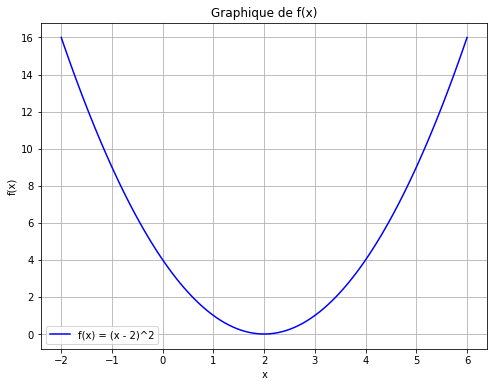

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Génération des valeurs de x dans l'intervalle [-2, 6]
x_values = np.linspace(-2, 6, 100)  # 100 points entre -2 et 6

# Calcul des valeurs correspondantes de f(x)
y_values = square(x_values)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='f(x) = (x - 2)^2', color='blue')
plt.title('Graphique de f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()



Calculer la dérivée de la fonction ci dessus et faire une **fonction deriv_f_function(x)** qui retoune la dérivée de f en un point x donné

In [4]:
def deriv_f_function(x):
    return 2*(x-2)

Faire une fonction **gradient_descent(x0, alpha, n_iteration)** qui prend un point $x_0$ initial et qui effectue la descente de gradient pour n_iteration.

La fonction  **gradient_descent** devra renvoyer la liste de tous les points intermediaires

In [5]:
def gradient_descent(x0, alpha, n_iteration):
    # Liste pour stocker les points intermédiaires
    points = [x0]
    
    # Boucle pour les itérations
    for _ in range(n_iteration):
        # Calculer le gradient de f au point actuel
        gradient = deriv_f_function(points[-1])
        
        # Mettre à jour le point selon la formule de la descente de gradient
        new_point = points[-1] - alpha * gradient
        
        # Ajouter le nouveau point à la liste des points
        points.append(new_point)
    
    return points


Calculer le vecteur de la descente de gradient pour n_iteration =10, alpha = 0.1 et x0 = 5.5

Afficher sur un même graphique la fonction et le gradient

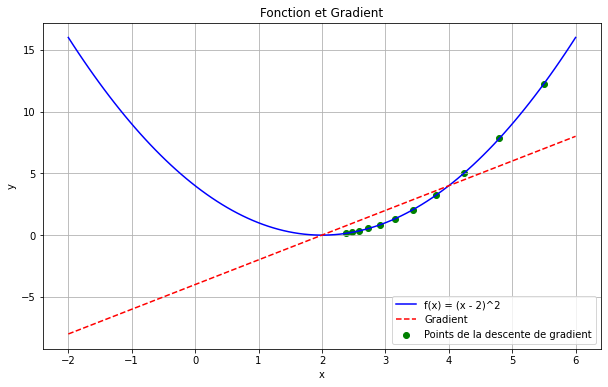

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def vector_gradient(x0,alpha,n_iteration):


    # Calcul de la descente de gradient
    points = gradient_descent(x0, alpha, n_iteration)

    # Génération des valeurs de x dans l'intervalle [-2, 6]
    x_values = np.linspace(-2, 6, 100)  # 100 points entre -2 et 6

    # Calcul des valeurs correspondantes de f(x)
    y_values = square(x_values)

    # Calcul des valeurs correspondantes du gradient
    gradient_values = deriv_f_function(x_values)

    # Création du graphique
    plt.figure(figsize=(10, 6))

    # Graphe de f(x)
    plt.plot(x_values, y_values, label='f(x) = (x - 2)^2', color='blue')

    # Graphe du gradient
    plt.plot(x_values, gradient_values, label='Gradient', linestyle='--', color='red')

    # Points de la descente de gradient
    plt.scatter(points, [square(p) for p in points], color='green', label='Points de la descente de gradient')

    plt.title('Fonction et Gradient')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

vector_gradient(5.5,0.1,10)


Faire de même pour n_iteration=10, alpha = 0.3 et x0 = 5.5

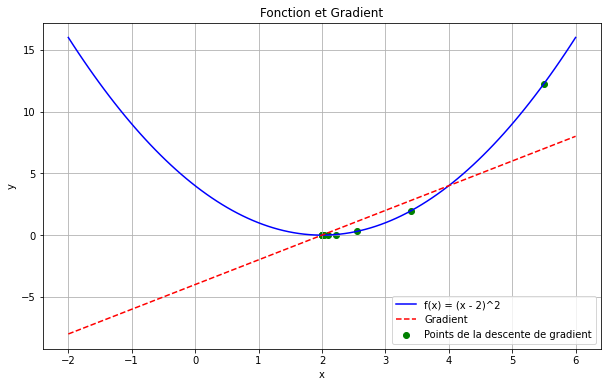

In [9]:
import numpy as np
import matplotlib.pyplot as plt


vector_gradient(5.5,0.3,10)



Faire de même pour n_iteration = 10, alpha = 0.01 et x0 = 5.5

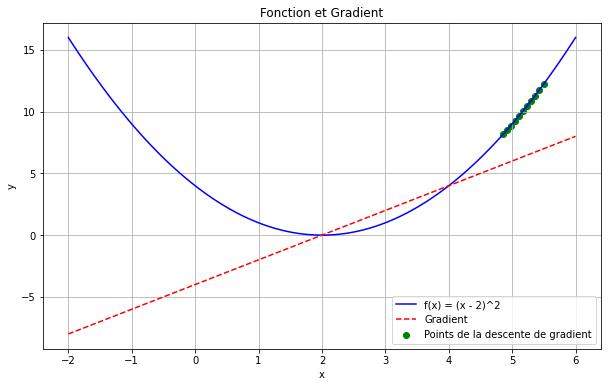

In [10]:
vector_gradient(5.5,0.01,10)


Faire de même pour n_iteration = 10, alpha = 2 et x0 = 5.5

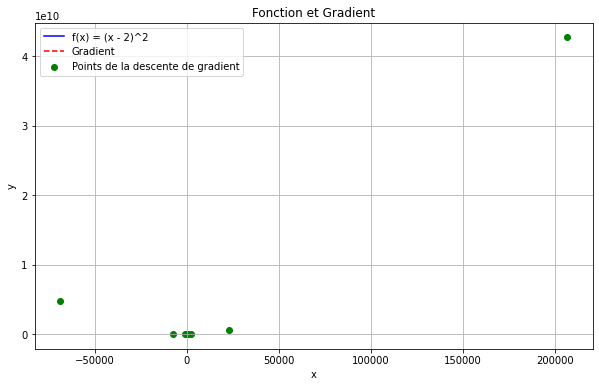

In [11]:
vector_gradient(5.5,2,10)



Que se passe-t-il si le learning rate est trop grand ?

On ne vas jamais atteindre le minimum, ni même y convergé car on va "taper" les parois de la fonction.

## Version 2D


Coder une fonction **two_arg_polynomial(x, y)** qui retourne x*y + (x - 2) ^2 + (y +1) ^2

In [12]:
def two_arg_polynomial(x,y):
    return x*y+((x-2)**2)+(y+1)**2

Afficher le graphe 3D de z = f(x,y) en fonction de x et y  avec matplotlib

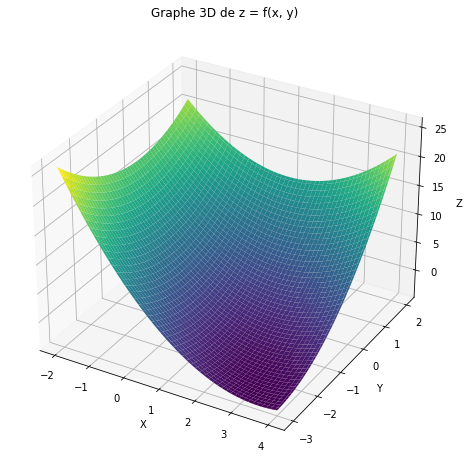

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Génération des valeurs de x et y dans un maillage
x_values = np.linspace(-2, 4, 100)
y_values = np.linspace(-3, 2, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calcul des valeurs correspondantes de z
Z = two_arg_polynomial(X, Y)

# Création de la figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Affichage du graphe 3D
ax.plot_surface(X, Y, Z, cmap='viridis')

# Ajout de labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Titre du graphique
plt.title('Graphe 3D de z = f(x, y)')

# Affichage
plt.show()


Calculer la formule du gradient pour cette fonction

In [15]:
def gradient_poly(inputs):
    x,y = inputs
    
    deriv_partial_x = 2 * x * (y-1) ** 2 + 2 * x
    deriv_partial_y = 2  * (y-1) * x ** 2 + 2 * (y-1)
    return np.array([deriv_partial_x, deriv_partial_y])

Coder la fonction **descent_gradient_2D_polynomial** pour cette fonction de la même manière que l'exercice précédent 

In [16]:
def descent_gradient_2D_polynomial(initial_values, alpha, n_iteration):


    inputs = initial_values

    for i in range(n_iteration):

        new_inputs = inputs - alpha * gradient_poly(inputs)

        inputs = new_inputs
    
    return inputs 

Effectuer la descente de gradient sur votre fonction et afficher les points par lequel elle passe pour alpha = 0.1 et en prenant x0 =3 et y0 = 3

In [17]:
initial_values = 3,3
descent_gradient_2D_polynomial(initial_values,0.1,100)

array([0., 1.])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12ee9a93-a90a-41bf-be00-5217ae073daf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>